# Preparation of the second order results:

## Models

In [1]:
from Codes.ModelingUtils.trainer import Pipeline
import pandas as pd

models = [
        {'name': 'btc_mlp', 'model': 'MLP', 'lr': 2.0e-3, 'wd': 5.5e-2},
        {'name': 'btc_cnn', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
        {'name': 'btc_rnn', 'model': 'RNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
        {'name': 'btc_gru', 'model': 'GRU', 'lr': 2.0e-3, 'wd': 5.5e-2},
        {'name': 'btc_lstm', 'model': 'LSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
        {'name': 'btc_cnnlstm', 'model': 'CNNLSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
         ]

for model in models:
    print(model.get('name'))
    final_results = []
    pipeline = None
    pipeline = Pipeline(model.get('name'), model.get('model'), batch_size=90, update_scaler=True, weighted=True, silent=True)
    for i in range(0, 32, 1):
        seed = 16734 + i
        print(i)
        pipeline.model_name = model.get('name') + '_' + str(i)
        pipeline.generate_model(seed=seed, silent=True)
        pipeline.train_model(lr=model.get('lr'), weight_decay=model.get('wd'), patience=2, just_load=True)
        _ = pipeline.search_results()
        vresults0 = pipeline.fast_evaluation(0.00, stage='validation')
        tresults0 = pipeline.fast_evaluation(0.00, stage='test', break_results=True)
        final_results.append([f'{model.get("name")}0', *vresults0, *tresults0])
    df = pd.DataFrame(final_results, columns=['name', 'v_acc', 'v_tpr', 'v_auc', 'v_ar0', 'v_mdd0', 't_acc', 't_tpr', 't_auc', 't_ar0', 't_mdd0'])
    df.to_excel(f'Results/results_{model.get("name")}.xlsx')

In [2]:
import pandas as pd

models = [
        {'name': 'btc_mlp', 'model': 'MLP', 'lr': 2.0e-3, 'wd': 5.5e-2},
        {'name': 'btc_cnn', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
        {'name': 'btc_rnn', 'model': 'RNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
        {'name': 'btc_gru', 'model': 'GRU', 'lr': 2.0e-3, 'wd': 5.5e-2},
        {'name': 'btc_lstm', 'model': 'LSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
        {'name': 'btc_cnnlstm', 'model': 'CNNLSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
         ]

stats = []

for item in models:
    df = pd.read_excel(f'Results/results_{item.get("name")}.xlsx', index_col='Unnamed: 0')
    
    mean = df.mean(numeric_only=True).values
    std = df.std(numeric_only=True).values
    stts = [[x,y] for x,y in zip(mean, std)]
    stts2 = [m for n in stts for m in n]
    s = [f'{item.get("name")}', *stts2]
    stats.append(s)
    
stats_df = pd.DataFrame(stats, columns=['name', 'v_acc_ave', 'v_acc_std', 'v_tpr_ave', 'v_tpr_std', 'v_auc_ave', 'v_auc_std', 'v_ar0_ave', 'v_ar0_std',
                                        'v_mdd0_ave', 'v_mdd0_std', 't_acc_ave', 't_acc_std', 't_tpr_ave', 't_tpr_std', 't_auc_ave', 't_auc_std',
                                        't_ar0_ave', 't_ar0_std', 't_mdd0_ave', 't_mdd0_std'])
stats_df.to_excel('Results/stats_of_the_models.xlsx')
print(stats_df)

          name  v_acc_ave  v_acc_std  v_tpr_ave  v_tpr_std  v_auc_ave  \
0      btc_mlp  54.619195   0.196883  54.939996   0.784358   0.564027   
1      btc_cnn  54.625094   0.191995  54.739873   0.521224   0.565004   
2      btc_rnn  54.652154   0.229869  55.015775   0.875427   0.564736   
3      btc_gru  54.787453   0.227473  55.023612   0.693811   0.566481   
4     btc_lstm  54.846723   0.166072  55.057548   0.616099   0.566524   
5  btc_cnnlstm  54.581648   0.210956  54.682378   0.495813   0.564172   

   v_auc_std  v_ar0_ave  v_ar0_std  v_mdd0_ave  ...  t_acc_ave  t_acc_std  \
0   0.001227  47.600523  12.580833   42.650135  ...  53.857264   0.304627   
1   0.002067  63.167999  16.525881   42.906977  ...  53.921128   0.199337   
2   0.002055  56.386367   9.806030   41.529957  ...  53.885617   0.161959   
3   0.001554  57.552741  14.135940   43.624836  ...  53.921970   0.248956   
4   0.000970  62.518831  13.091469   39.939883  ...  53.955938   0.228100   
5   0.001677  49.570398  1

## Innovations

In [3]:
from Codes.ModelingUtils.trainer import Pipeline
import pandas as pd



models = [
        {'name': 'btc_exc', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'exclude': True}},
        {'name': 'btc_l2l', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'l2_loss': True}},
        {'name': 'btc_log', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'log_stationary': True}},
         ]

for model in models:
    print(f'model= {model.get("name")}')
    final_results = []
    pipeline = Pipeline(model.get('name'), model.get('model'), suffix=1, batch_size=90, update_scaler=True, weighted=True, silent=True, **model.get('kw'))
    for i in range(0, 32, 1):
        seed = 16734 + i
        print(i)
        pipeline.model_name = model.get('name') + '_' + str(i)
        pipeline.generate_model(seed=seed, silent=True)
        pipeline.train_model(lr=model.get('lr'), weight_decay=model.get('wd'), patience=2, just_load=True)
        _ = pipeline.search_results()
        vresults0 = pipeline.fast_evaluation(0.00, stage='validation')
        tresults0 = pipeline.fast_evaluation(0.00, stage='test', break_results=True)
        final_results.append([f'{model.get("name")}0', *vresults0, *tresults0])
    df = pd.DataFrame(final_results, columns=['name', 'v_acc', 'v_tpr', 'v_auc', 'v_ar0', 'v_mdd0', 't_acc', 't_tpr', 't_auc', 't_ar0', 't_mdd0'])
    df.to_excel(f'Results/results_{model.get("name")}.xlsx')

In [4]:
import pandas as pd

models = [
        {'name': 'btc_exc', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'exclude': True}},
        {'name': 'btc_l2l', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'l2_loss': True}},
        {'name': 'btc_log', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'log_stationary': True}},
         ]

stats = []
for item in models:
    df = pd.read_excel(f'Results/results_{item.get("name")}.xlsx', index_col='Unnamed: 0')
    
    mean = df.mean(numeric_only=True).values
    std = df.std(numeric_only=True).values
    stts = [[x,y] for x,y in zip(mean, std)]
    stts2 = [m for n in stts for m in n]
    s = [f'{item.get("name")}0', *stts2]
    stats.append(s)

stats_df = pd.DataFrame(stats, columns=['name', 'v_acc_ave', 'v_acc_std', 'v_tpr_ave', 'v_tpr_std', 'v_auc_ave', 'v_auc_std', 'v_ar0_ave', 'v_ar0_std',
                                        'v_mdd0_ave', 'v_mdd0_std', 't_acc_ave', 't_acc_std', 't_tpr_ave', 't_tpr_std', 't_auc_ave', 't_auc_std',
                                        't_ar0_ave', 't_ar0_std', 't_mdd0_ave', 't_mdd0_std'])
stats_df.to_excel('Results/stats_of_the_innovations.xlsx')
print(stats_df)

       name  v_acc_ave  v_acc_std  v_tpr_ave  v_tpr_std  v_auc_ave  v_auc_std  \
0  btc_exc0  54.609363   0.219612  54.741224   0.562084   0.564775   0.002682   
1  btc_l2l0  54.638577   0.191214  54.769612   0.539951   0.564854   0.002007   
2  btc_log0  54.283989   0.143096  54.482433   0.498495   0.560112   0.001566   

   v_ar0_ave  v_ar0_std  v_mdd0_ave  ...  t_acc_ave  t_acc_std  t_tpr_ave  \
0  62.145402  16.296174   43.264304  ...  53.927304   0.233281  54.178798   
1  59.216876  13.825189   43.660579  ...  53.935024   0.211451  54.293376   
2  16.524632  13.321555   40.554049  ...  53.637458   0.193812  53.957072   

   t_tpr_std  t_auc_ave  t_auc_std  t_ar0_ave  t_ar0_std  t_mdd0_ave  \
0   0.446113   0.557122   0.002073  65.979544   5.644956   13.225340   
1   0.531963   0.557048   0.002094  64.770937   7.142803   12.703030   
2   0.496521   0.551937   0.001428  50.812214   8.056690   11.257228   

   t_mdd0_std  
0    1.896002  
1    1.841999  
2    3.614036  

[3 rows x 21

# Results tables

## Models

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

models = [{'name': 'btc_mlp', 'model': 'MLP', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_cnn', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_rnn', 'model': 'RNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_gru', 'model': 'GRU', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_lstm', 'model': 'LSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_cnnlstm', 'model': 'CNNLSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
         ]
metrics = ['acc', 'tpr', 'auc', 'ar0', 'mdd0']
column_name = 't_acc'

data = []
for model in models:
    df = pd.read_excel(f'Results/results_{model.get("name")}.xlsx', index_col='Unnamed: 0')
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    df = df.loc[(df[column_name] > (q1 - 1.5*IQR)) & (df[column_name] < (q3 + 1.5*IQR))].copy()
    n = len(df)
    row = []
    for metric in metrics:
        column = 't' + '_' + metric
        if metric == 'ar0':
            df[column] = df[column] / 16
        mean = df[column].mean()
        std = df[column].std()
        ci = 1.96 * std / np.sqrt(n)
        row.append(f'{mean:0.3f}±{ci:0.3f}')
    data.append(row)

df = pd.read_csv(f'Results/btc_lstm_0_test_break0.csv', index_col='Unnamed: 0')
bnh = df['bnh'].to_list()
mdd = df['mdd'].to_list()[0]
    
data.append(['-', '-', '-', f'{np.mean(bnh):0.3f}±{0.000}', f'{mdd:0.3f}±{0.000}'])
indexes = [m.get('name') for m in models]
indexes.append('B&H')
new_df = pd.DataFrame(data, index=indexes, columns=metrics)
new_df

,acc,tpr,auc,ar0,mdd0
btc_mlp,53.883±0.096,54.453±0.276,0.556±0.001,3.620±0.151,11.817±0.582
btc_cnn,53.955±0.055,54.174±0.166,0.557±0.001,4.182±0.123,13.176±0.681
btc_rnn,53.886±0.056,54.644±0.289,0.556±0.001,3.375±0.150,12.502±0.971
btc_gru,53.943±0.078,54.533±0.161,0.557±0.001,3.384±0.143,12.973±0.563
btc_lstm,53.956±0.079,54.572±0.175,0.557±0.001,3.362±0.180,13.033±0.434
btc_cnnlstm,53.902±0.062,54.179±0.162,0.556±0.000,3.557±0.148,13.303±0.631
B&H,-,-,-,3.450±0.0,21.705±0.0


## Innovations

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

models = [
        {'name': 'btc_cnn', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'exclude': False}},
        {'name': 'btc_exc', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'exclude': True}},
        {'name': 'btc_l2l', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'l2_loss': True}},
        {'name': 'btc_log', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'log_stationary': True}},  
         ]
metrics = ['acc', 'tpr', 'auc', 'ar0', 'mdd0']
column_name = 't_acc'

data = []
for model in models:
    df = pd.read_excel(f'Results/results_{model.get("name")}.xlsx', index_col='Unnamed: 0')
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    df = df.loc[(df[column_name] > (q1 - 1.5*IQR)) & (df[column_name] < (q3 + 1.5*IQR))].copy()
    n = len(df)
    row = []
    for metric in metrics:
        column = 't' + '_' + metric
        if metric == 'ar0':
            df[column] = df[column] / 16
        mean = df[column].mean()
        std = df[column].std()
        ci = 1.96 * std / np.sqrt(n)
        row.append(f'{mean:0.3f}±{ci:0.3f}')
    data.append(row)
new_df = pd.DataFrame(data, index=[m.get('name') for m in models], columns=metrics)
new_df

,acc,tpr,auc,ar0,mdd0
btc_cnn,53.955±0.055,54.174±0.166,0.557±0.001,4.182±0.123,13.176±0.681
btc_exc,53.927±0.081,54.179±0.155,0.557±0.001,4.124±0.122,13.225±0.657
btc_l2l,53.935±0.073,54.293±0.184,0.557±0.001,4.048±0.155,12.703±0.638
btc_log,53.637±0.067,53.957±0.172,0.552±0.000,3.176±0.174,11.257±1.252


## CNN model

In [7]:
from Codes.ModelingUtils.trainer import Pipeline
import pandas as pd

models = [
        {'name': 'btc_cnn', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
         ]

for model in models:
    final_results = []
    pipeline = Pipeline(model.get('name'), model.get('model'), suffix=1, batch_size=90, update_scaler=True, weighted=True, silent=True)
    for i in range(32):
        seed = 16734 + i
        print(i)
        pipeline.model_name = model.get('name') + '_' + str(i)
        pipeline.generate_model(seed=seed, silent=True)
        pipeline.train_model(lr=model.get('lr'), weight_decay=model.get('wd'), patience=2, just_load=True)
        _ = pipeline.search_results()
        presults1 = pipeline.fast_evaluation(0.00, stage='train', break_results=True)
        vresults1 = pipeline.fast_evaluation(0.00, stage='validation', break_results=True)
        tresults1 = pipeline.fast_evaluation(0.00, stage='test', break_results=True)
        final_results.append([f'{model.get("name")}1', *presults1, *vresults1, *tresults1])
    df = pd.DataFrame(final_results, columns=['name', 'p_acc', 'p_tpr', 'p_auc', 'p_ar0', 'p_mdd0', 'v_acc', 'v_tpr', 'v_auc', 'v_ar0', 'v_mdd0', 't_acc', 't_tpr', 't_auc', 't_ar0', 't_mdd0'])
    df.to_excel(f'Results/results_{model.get("name")}2.xlsx')

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

models = [
          {'name': 'btc_cnn', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
         ]
n = 32
column_name = 't_acc'
for model in models:
    df = pd.read_excel(f'Results/results_{model.get("name")}2.xlsx', index_col='Unnamed: 0')
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    df = df.loc[(df[column_name] > (q1 - 1.5*IQR)) & (df[column_name] < (q3 + 1.5*IQR))].copy()
    n = len(df)
    datasets = ['p', 'v', 't']
    metrics = ['acc', 'tpr', 'auc', 'ar0', 'mdd0']
    data = []
    for dataset in datasets:
        row = []
        for metric in metrics:
            column = dataset + '_' + metric
            if metric == 'ar0':
                df[column] = df[column]/16
            mean = df[column].mean()
            std = df[column].std()
            ci = 1.96 * std / np.sqrt(n)
            row.append(f'{mean:0.3f}±{ci:0.3f}')
        data.append(row)
    new_df = pd.DataFrame(data, index=datasets, columns=metrics)
new_df

,acc,tpr,auc,ar0,mdd0
p,54.786±0.063,55.051±0.139,0.569±0.001,71.843±2.276,14.854±1.291
v,54.635±0.067,54.735±0.193,0.565±0.001,3.999±0.364,42.850±1.871
t,53.955±0.055,54.174±0.166,0.557±0.001,4.182±0.123,13.176±0.681


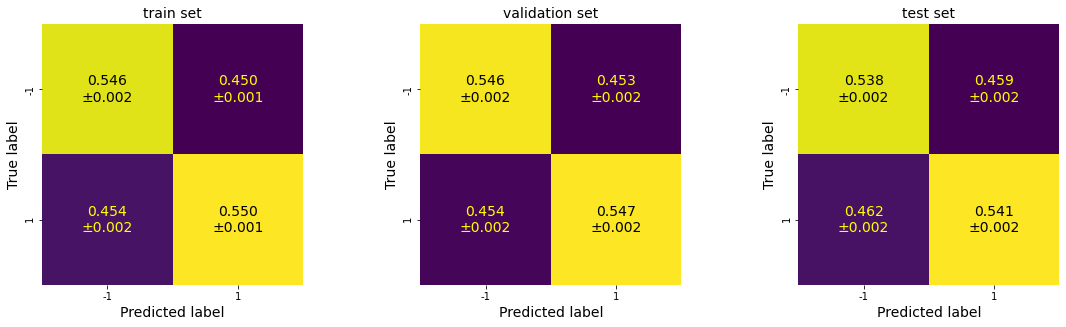

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import sem

# fig = plt.figure(figsize=(24, 4.8))
# ax = fig.add_axes([0.05,0.05,0.95,0.95])
fig, axs = plt.subplots(1, 3, figsize=(19.2, 4.8))
# 
for idx, name in enumerate(['train', 'validation', 'test']):
    ms = []
    for i in range(32):
        with open(f'./Confusion matrices/cm_btc_cnn_{i}_{name}0.npy', 'rb') as f:
            rm = np.load(f)
            m = np.array([[rm[0, 0]/(rm[0, 0] + rm[1, 0]), rm[0, 1]/(rm[0, 1] + rm[1, 1])], [rm[1, 0]/(rm[0, 0] + rm[1, 0]), rm[1, 1]/(rm[0, 1] + rm[1, 1])]])
            ms.append(m)
    ms = np.array(ms)

    # Initialize arrays to store mean, std, and confidence intervals
    m_mean = np.zeros_like(ms[0])
    m_std = np.zeros_like(ms[0])

    # Calculate mean and standard deviation for each element across matrices
    for g in range(ms.shape[1]):
        for b in range(ms.shape[2]):
            values = ms[:, g, b]
            m_mean[g, b] = np.mean(values)
            m_std[g, b] = np.std(values)
    m_ci = 1.96 * m_std / np.sqrt(32)
    xticklabels = ["-1", "1"]
    yticklabels = ["-1", "1"]

    # Create a heatmap of the mean values with custom axis labels, using the provided ax
    sns.heatmap(m_mean, annot=False, cmap="viridis", cbar=False, square=True,
                xticklabels=xticklabels, yticklabels=yticklabels, ax=axs[idx])

    # Add text annotations for each element with mean and confidence interval
    for i in range(m_mean.shape[0]):
        for j in range(m_mean.shape[1]):
            mean_val = m_mean[i, j]
            ci_val = m_ci[i, j]  # Use upper CI as a convenient way to calculate the width of the interval
            clr = 'black' if mean_val > 0.5 else 'yellow'
            axs[idx].text(j + 0.5, i + 0.5, f"{mean_val:.3f}\n±{ci_val:.3f}", color=clr, ha='center', va='center', fontsize=14)

    axs[idx].set_title(f'{name} set', fontsize=14)
    axs[idx].set_ylabel("True label", fontsize=14)
    axs[idx].set_xlabel("Predicted label", fontsize=14)

plt.show()
fig.savefig('Images/cnn_results.png')

# Visualizing the results

## $\color{red}{\text{Accuracy}}$

### Models

for btc_mlp outliers:
26    53.054258
Name: t_acc, dtype: float64

for btc_cnn outliers:
18    53.382142
29    53.454006
Name: t_acc, dtype: float64

for btc_rnn outliers:
Series([], Name: t_acc, dtype: float64)

for btc_gru outliers:
18    53.269853
Name: t_acc, dtype: float64

for btc_lstm outliers:
Series([], Name: t_acc, dtype: float64)

for btc_cnnlstm outliers:
Series([], Name: t_acc, dtype: float64)

medians: [53.91214516708588, 53.97278117139777, 53.91663672296083, 53.98401006108516, 53.94134028027309, 53.93235716852318]
IQRs: [0.33125224577793233, 0.21896334890405456, 0.20548868127919917, 0.31553180021560223, 0.31440891124685777, 0.22233201581028084]
means: [53.88316738724745, 53.954665229368786, 53.88561691519942, 53.94300650261379, 53.955937836866696, 53.901898805246134]
STDs: [0.2670696641191482, 0.15158466887635985, 0.15940815674001502, 0.21867493610988686, 0.22450760221806723, 0.17643739075012738]


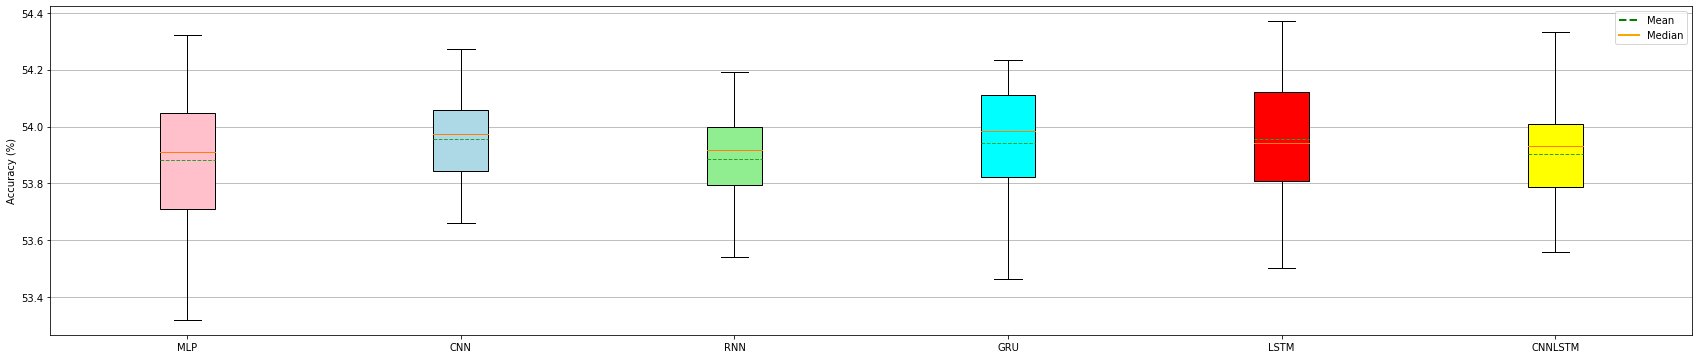

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

models = [{'name': 'btc_mlp', 'model': 'MLP', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_cnn', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_rnn', 'model': 'RNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_gru', 'model': 'GRU', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_lstm', 'model': 'LSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_cnnlstm', 'model': 'CNNLSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
         ]

column_name = 't_acc'
column_name2 = 't_acc'

data = []
iqrs = []
stds = []

for model in models:
    df = pd.read_excel(f'Results/results_{model.get("name")}.xlsx', index_col='Unnamed: 0')
    
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    new_df = df.loc[(df[column_name] > (q1 - 1.5*IQR)) & (df[column_name] < (q3 + 1.5*IQR))].copy()
    print(f'for {model.get("name")} outliers:\n{df.loc[~((df[column_name] > (q1 - 1.5*IQR)) & (df[column_name] < (q3 + 1.5*IQR))), column_name]}\n')

    d = new_df[column_name2].to_list()
    data.append(d)
    iqrs.append(IQR)
    stds.append(np.std(d))

bins = len(data)
ticks = np.arange(bins)
fig = plt.figure(figsize=(24, 4.8))
ax = fig.add_axes([0.05,0.05,0.95,0.95])
box_data = []
for i, t in zip(np.arange(len(data)), 0.12*np.arange(len(data))):
    box_data.append(data[i])


bplots = ax.boxplot(box_data, vert=True, patch_artist=True, widths=0.2, notch=False, meanline=True, showmeans=True, labels=['MLP', 'CNN', 'RNN', 'GRU', 'LSTM', 'CNNLSTM'])
colors = ['pink', 'lightblue', 'lightgreen', 'cyan', 'red', 'yellow']

for patch, color in zip(bplots['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True, 'both')
ax.set_xlabel('')
ax.set_ylabel('Accuracy (%)')

bp = bplots
meds = []
for medline in bp['medians']:
    linedata = medline.get_ydata()
    median = linedata[0]
    meds.append(median)
print('medians:', meds)
print('IQRs:', iqrs)

means = []
for medline in bp['means']:
    linedata = medline.get_ydata()
    mean = linedata[0]
    means.append(mean)
print('means:', means)
print('STDs:', stds)

mean_legend = Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='Mean')
median_legend = Line2D([0], [0], color='orange', linestyle='-', linewidth=2, label='Median')

ax.legend(handles=[mean_legend, median_legend])

fig.savefig('Images/models_ACC_s0.png', dpi=100)
plt.show()

### Innovations

for btc_cnn outliers:
18    53.382142
29    53.454006
Name: t_acc, dtype: float64

for btc_exc outliers:
Series([], Name: t_acc, dtype: float64)

for btc_l2l outliers:
Series([], Name: t_acc, dtype: float64)

for btc_log outliers:
Series([], Name: t_acc, dtype: float64)

medians: [53.97278117139777, 53.98176428314768, 53.925619834710744, 53.6201940352138]
IQRs: [0.21896334890405456, 0.28072224218468733, 0.25938735177866334, 0.25938735177865624]
means: [53.954665229368786, 53.92730416816385, 53.93502402982393, 53.63745845310815]
STDs: [0.15158466887635985, 0.22960745659786444, 0.20812061500113246, 0.19075933583181506]


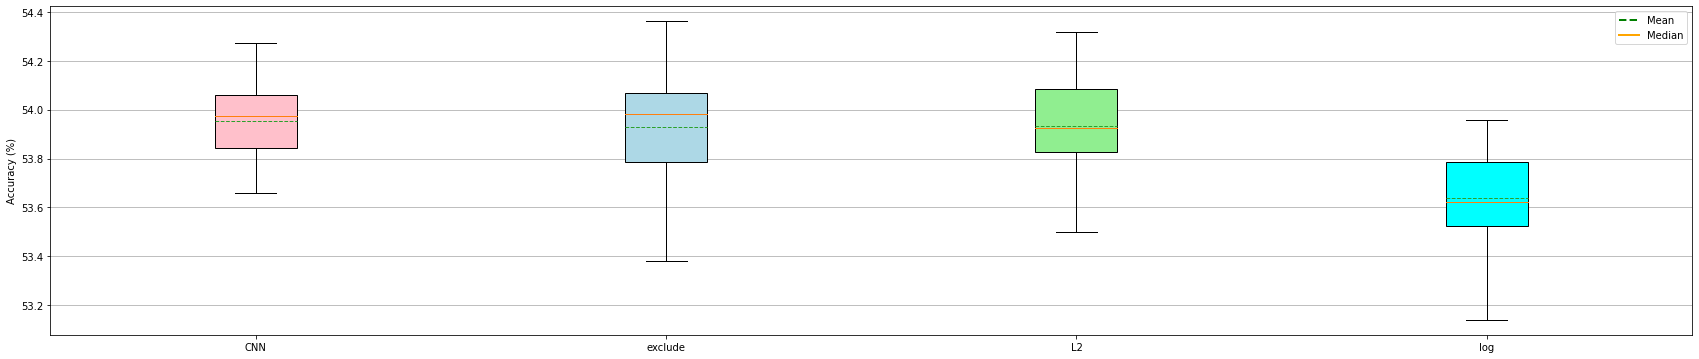

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

models = [
        {'name': 'btc_cnn', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'exclude': False}},
        {'name': 'btc_exc', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'exclude': True}},
        {'name': 'btc_l2l', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'l2_loss': True}},
        {'name': 'btc_log', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'log_stationary': True}},
         ]

column_name = 't_acc'
column_name2 = 't_acc'

data = []
iqrs = []
stds = []
for model in models:
    df = pd.read_excel(f'Results/results_{model.get("name")}.xlsx', index_col='Unnamed: 0')
    
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    new_df = df.loc[(df[column_name] > (q1 - 1.5*IQR)) & (df[column_name] < (q3 + 1.5*IQR))].copy()
    print(f'for {model.get("name")} outliers:\n{df.loc[~((df[column_name] > (q1 - 1.5*IQR)) & (df[column_name] < (q3 + 1.5*IQR))), column_name]}\n')
    
    d = new_df[column_name2].to_list()
    data.append(d)
    iqrs.append(IQR)
    stds.append(np.std(d))

bins = len(data)
ticks = np.arange(bins)
fig = plt.figure(figsize=(24, 4.8))
ax = fig.add_axes([0.05,0.05,0.95,0.95])
box_data = []
for i, t in zip(np.arange(len(data)), 0.12*np.arange(len(data))):
    box_data.append(data[i])
    
bplots = ax.boxplot(box_data, vert=True, patch_artist=True, widths=0.2, notch=False, meanline=True, showmeans=True, labels=['CNN', 'exclude', 'L2', 'log'])
colors = ['pink', 'lightblue', 'lightgreen', 'cyan']

for patch, color in zip(bplots['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)
ax.set_xlabel('')
ax.set_ylabel('Accuracy (%)')

bp = bplots
meds = []
for medline in bp['medians']:
    linedata = medline.get_ydata()
    median = linedata[0]
    meds.append(median)
print('medians:', meds)
print('IQRs:', iqrs)

means = []
for medline in bp['means']:
    linedata = medline.get_ydata()
    mean = linedata[0]
    means.append(mean)
print('means:', means)
print('STDs:', stds)

mean_legend = Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='Mean')
median_legend = Line2D([0], [0], color='orange', linestyle='-', linewidth=2, label='Median')

ax.legend(handles=[mean_legend, median_legend])

fig.savefig('Images/innovations_ACC_s0.png', dpi=100)

plt.show()

## $\color{red}{\text{Profit in spot market}}$

### Models

for btc_mlp outliers:
26    55.432534
Name: t_ar0, dtype: float64

for btc_cnn outliers:
18    60.548317
29    58.814160
Name: t_ar0, dtype: float64

for btc_rnn outliers:
Series([], Name: t_ar0, dtype: float64)

for btc_gru outliers:
18    31.421399
Name: t_ar0, dtype: float64

for btc_lstm outliers:
Series([], Name: t_ar0, dtype: float64)

for btc_cnnlstm outliers:
Series([], Name: t_ar0, dtype: float64)

medians: [57.87029502281815, 67.16231931794431, 53.91307292223152, 55.84420871532229, 52.993843644234914, 57.09639577536892, 55.2062714098609]
IQRs: [0.33125224577793233, 0.21896334890405456, 0.20548868127919917, 0.31553180021560223, 0.31440891124685777, 0.22233201581028084]
means: [57.92735221204391, 66.91864016772064, 53.99226038582091, 54.1410196849873, 53.78996674430717, 56.90529566788839, 55.2062714098609]
STDs: [6.765001523464068, 5.420411890340568, 6.80921801046715, 6.380158561702088, 8.197109448381186, 6.717950075322065]


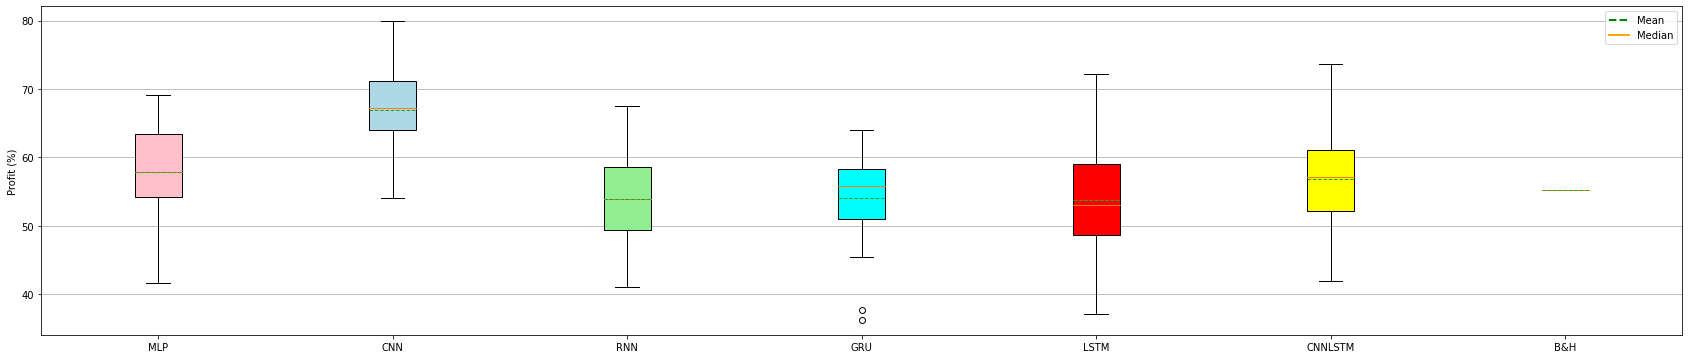

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

models = [{'name': 'btc_mlp', 'model': 'MLP', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_cnn', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_rnn', 'model': 'RNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_gru', 'model': 'GRU', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_lstm', 'model': 'LSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_cnnlstm', 'model': 'CNNLSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
         ]

column_name = 't_acc'
column_name2 = 't_ar0'

data = []
iqrs = []
stds = []

for model in models:
    df = pd.read_excel(f'Results/results_{model.get("name")}.xlsx', index_col='Unnamed: 0')
    
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    new_df = df.loc[(df[column_name] > (q1 - 1.5*IQR)) & (df[column_name] < (q3 + 1.5*IQR))].copy()
    print(f'for {model.get("name")} outliers:\n{df.loc[~((df[column_name] > (q1 - 1.5*IQR)) & (df[column_name] < (q3 + 1.5*IQR))), column_name2]}\n')
    
    d = new_df[column_name2].to_list()
    data.append(d)
    iqrs.append(IQR)
    stds.append(np.std(d))

df = pd.read_csv(f'Results/btc_lstm_0_test_break0.csv', index_col='Unnamed: 0')
bnh = df['bnh'].to_list()
data.append(np.sum(bnh))

bins = len(data)
ticks = np.arange(bins)
fig = plt.figure(figsize=(24, 4.8))
ax = fig.add_axes([0.05,0.05,0.95,0.95])

bplots = ax.boxplot(data, vert=True, patch_artist=True, widths=0.2, notch=False, meanline=True, showmeans=True, labels=['MLP', 'CNN', 'RNN', 'GRU', 'LSTM', 'CNNLSTM', 'B&H'])

colors = ['pink', 'lightblue', 'lightgreen', 'cyan', 'red', 'yellow', 'black']

for patch, color in zip(bplots['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)
ax.set_xlabel('')
ax.set_ylabel('Profit (%)')

bp = bplots
meds = []
for medline in bp['medians']:
    linedata = medline.get_ydata()
    median = linedata[0]
    meds.append(median)
print('medians:', meds)
print('IQRs:', iqrs)

means = []
for medline in bp['means']:
    linedata = medline.get_ydata()
    mean = linedata[0]
    means.append(mean)
print('means:', means)
print('STDs:', stds)

mean_legend = Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='Mean')
median_legend = Line2D([0], [0], color='orange', linestyle='-', linewidth=2, label='Median')

ax.legend(handles=[mean_legend, median_legend])

fig.savefig('Images/models_spot_s0.png', dpi=100)
plt.show()

### Innovations

for btc_cnn outliers:
18    60.548317
29    58.814160
Name: t_ar0, dtype: float64

for btc_exc outliers:
Series([], Name: t_ar0, dtype: float64)

for btc_l2l outliers:
Series([], Name: t_ar0, dtype: float64)

for btc_log outliers:
Series([], Name: t_ar0, dtype: float64)

medians: [67.16231931794431, 66.70155965162307, 65.16627082763185, 51.23243930380288, 55.2062714098609]
IQRs: [0.21896334890405456, 0.28072224218468733, 0.25938735177866334, 0.25938735177865624]
means: [66.91864016772064, 65.97954429236016, 64.77093681689723, 50.81221441892001, 55.2062714098609]
STDs: [5.420411890340568, 5.556053016625032, 7.030310965111476, 7.929804599247751]


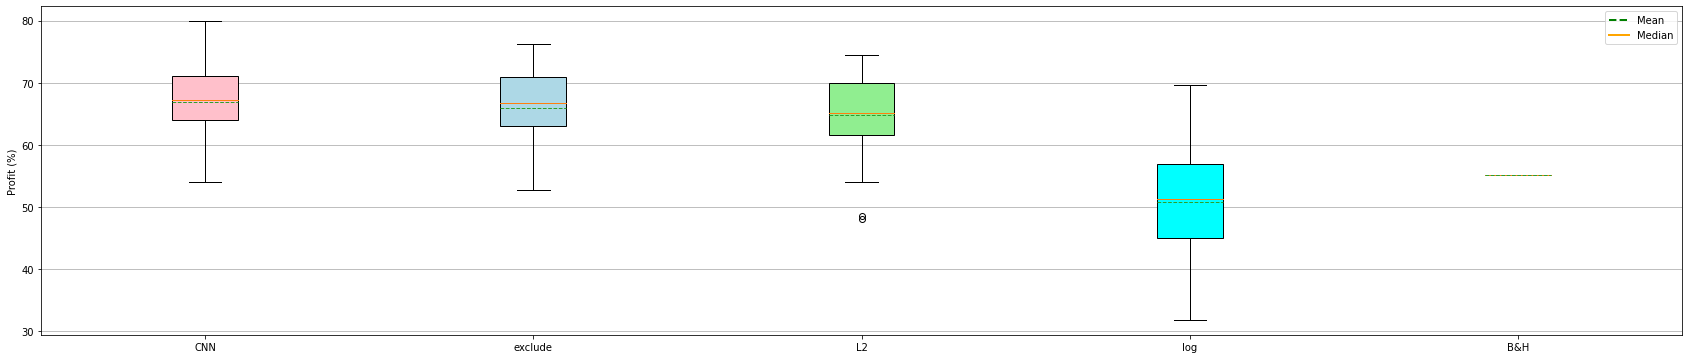

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np


models = [
        {'name': 'btc_cnn', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'exclude': False}},
        {'name': 'btc_exc', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'exclude': True}},
        {'name': 'btc_l2l', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'l2_loss': True}},
        {'name': 'btc_log', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2, 'kw': {'log_stationary': True}},
         ]

column_name = 't_acc'
column_name2 = 't_ar0'

data = []
iqrs = []
stds = []
for model in models:
    df = pd.read_excel(f'Results/results_{model.get("name")}.xlsx', index_col='Unnamed: 0')
    
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    new_df = df.loc[(df[column_name] > (q1 - 1.5*IQR)) & (df[column_name] < (q3 + 1.5*IQR))].copy()
    print(f'for {model.get("name")} outliers:\n{df.loc[~((df[column_name] > (q1 - 1.5*IQR)) & (df[column_name] < (q3 + 1.5*IQR))), column_name2]}\n')
    
    d = new_df[column_name2].to_list()
    data.append(d)
    iqrs.append(IQR)
    stds.append(np.std(d))

df = pd.read_csv(f'Results/btc_lstm_0_test_break0.csv', index_col='Unnamed: 0')
bnh = df['bnh'].to_list()
data.append(np.sum(bnh))    
    
bins = len(data)
ticks = np.arange(bins)
fig = plt.figure(figsize=(24, 4.8))
ax = fig.add_axes([0.05,0.05,0.95,0.95])

bplots = ax.boxplot(data, vert=True, patch_artist=True, widths=0.2, notch=False, meanline=True, showmeans=True, labels=['CNN', 'exclude', 'L2', 'log', 'B&H'])
colors = ['pink', 'lightblue', 'lightgreen', 'cyan', 'black']

for patch, color in zip(bplots['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)
ax.set_xlabel('')
ax.set_ylabel('Profit (%)')

bp = bplots
meds = []
for medline in bp['medians']:
    linedata = medline.get_ydata()
    median = linedata[0]
    meds.append(median)
print('medians:', meds)
print('IQRs:', iqrs)

means = []
for medline in bp['means']:
    linedata = medline.get_ydata()
    mean = linedata[0]
    means.append(mean)
print('means:', means)
print('STDs:', stds)

mean_legend = Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='Mean')
median_legend = Line2D([0], [0], color='orange', linestyle='-', linewidth=2, label='Median')

ax.legend(handles=[mean_legend, median_legend])

fig.savefig('Images/innovations_spot_s0.png', dpi=100)
plt.show()

## $\color{red}{\text{Break of profits}}$

### Models

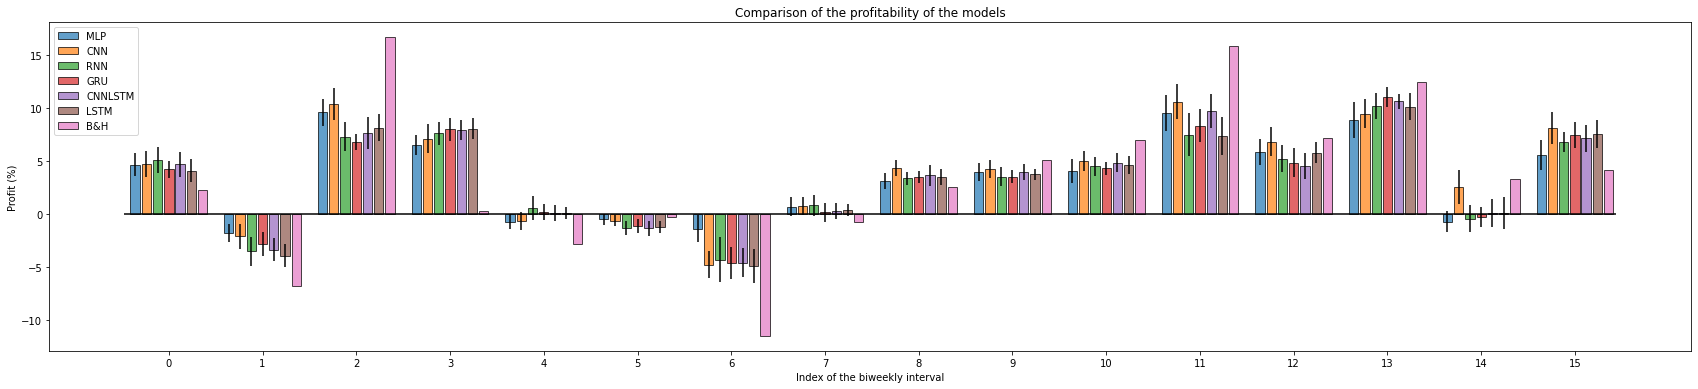

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

def calculate_confidence_intervals(means, std_devs, confidence_interval=1.96):
    lower_bound = means - (confidence_interval * np.array(std_devs)) / np.sqrt(len(means))
    upper_bound = means + (confidence_interval * std_devs) / np.sqrt(len(means))
    return lower_bound, upper_bound

models = [{'name': 'btc_mlp', 'model': 'MLP', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_cnn', 'model': 'CNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_rnn', 'model': 'RNN', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_gru', 'model': 'GRU', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_cnnlstm', 'model': 'CNNLSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
          {'name': 'btc_lstm', 'model': 'LSTM', 'lr': 2.0e-3, 'wd': 5.5e-2},
         ]

column_name = 'profit'

full_data_mean = []
full_data_std = []

for model in models:
    data = []
    for i in range(32):
        df = pd.read_csv(f'Results/{model.get("name")}_{i}_test_break0.csv', index_col='Unnamed: 0')
        _ = df[column_name].to_list()
        data.append(_)
    
    columns = [f'p{i}' for i in range(16)]
    df1 = pd.DataFrame(data, columns=columns)
    d0 = []
    d1 = []
    for column_name0 in columns:
        q1 = df1[column_name0].quantile(0.25)
        q3 = df1[column_name0].quantile(0.75)
        IQR = q3 - q1
        new_d = df1.loc[(df1[column_name0] > (q1 - 1.5*IQR)) & (df1[column_name0] < (q3 + 1.5*IQR)), column_name0].copy()
        d0.append(new_d.mean())
        d1.append(new_d.std())

    full_data_mean.append(d0)
    full_data_std.append(d1)
    
df = pd.read_csv(f'Results/btc_lstm_0_test_break0.csv', index_col='Unnamed: 0')
bnh = df['bnh'].to_list()
full_data_mean.append(bnh)
full_data_std.append([0 for i in range(16)])
    
means = np.array(full_data_mean)
std_devs = np.array(full_data_std)

# Calculate confidence intervals
confidence_interval = 1.96  # 95% confidence interval
lower_bound, upper_bound = calculate_confidence_intervals(means, std_devs, confidence_interval)

bins = len(data[0])
ticks = np.arange(bins)
fig = plt.figure(figsize=(24, 4.8))
ax = fig.add_axes([0.05, 0.05, 0.95, 0.95])
ax.hlines(0, xmin=ticks[0] - 0.12, xmax=ticks[-1] + 0.80, color='black')

# Plotting bars with confidence intervals
models.append({'name': 'btc_bnh', 'model': 'B&H', 'lr': 2.0e-3, 'wd': 5.5e-2})
for i, t in zip(np.arange(len(models)), 0.12 * np.arange(len(models))):
    ax.bar(ticks + t, means[i], yerr=[means[i] - lower_bound[i], upper_bound[i] - means[i]],
           width=0.10, edgecolor='black', label=models[i]['model'], alpha=0.7)

# Adding legend
ax.legend()

# Setting ticks and labels
ax.set_xticks([tick + (3 * 0.12) for tick in ticks], labels=ticks)
ax.set_xlabel('Index of the biweekly interval')
ax.set_ylabel('Profit (%)')
ax.set_title('Comparison of the profitability of the models')

plt.show()
fig.savefig('Images/models_spot_breaked_profit_s0.png', dpi=100)